# Unsupervised Learning


The time series oscillate over time. Suppose this data is a working pump, some of this 
variability might be normal. 

There are 20 columns of data, so image each tick of data as a point in a 20-dimensional space.
Use the EM classifier to fit a mean and covariance for each class specified in num-class. 
Being near one of this clusters could indicate normal behaviour.

FIXME:
We don't know if num class should be 0, 1, .... ideally we would use a variational bayes 
to figure this out.

Plots the most likely class over time and see it change.


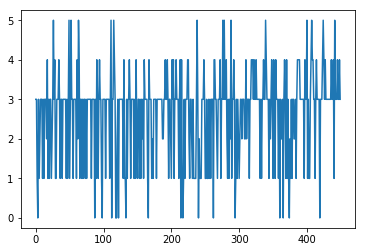

In [6]:
import numpy as np
import pandas as pd
import datetime as dt
from numpy.random import rand
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pylab as plt

from sklearn.mixture import BayesianGaussianMixture

import matplotlib.pylab as plt

# assume its sorted
data = pd.read_csv("~/data/esp_data_one_month_10_minute_interval.csv")

# update index to minutes since epoch
index = np.array([(dt.datetime.strptime(i, "%m/%d/%y %H:%M") - 
                    dt.datetime(1970,1,1)).total_seconds()/60 for i in data['DateTime'] ], 
                       dtype=np.int64)
data.index = index
data.drop('DateTime', 1, inplace=True)
# this messes things up because it trends
data.drop('CygNet_Connector_KRUNRSAC', 1, inplace=True)

# need to calibrate n_components!
mix = BayesianGaussianMixture(n_components=6)
res = mix.fit(data.values)
# insample
klass = res.predict(data)

plt.figure()
plt.plot(klass[::10])
plt.show()


In [7]:
print (res.converged_)

True
